# RAPORT 1 - KLASYFIKACJA 
<h4> Adrian Goik s23970 28.05.2024 - Indywidualny Program Studiów</h4>

<h3>TREŚĆ ZADANIA: Zadanie 3</h3>

W załączonym zbiorze danych <b><i>diabetes.csv </b></i>znajdują się dane kobiet indiańskiego pochodzenia z USA, które zachorowały lub nie zachorowały na cukrzycę. Klasyfikator ma na celu diagnozowanie choroby na podstawie parametrów medycznych kobiety. Sprawdź jak działają poznane klasyfikatory na tej bazie danych.<br> Dokonaj porównania:

<ol>
<li><b><i>k-NN, k=3</b></i></li>
<li><b><i>k-NN, k=5</b></i></li>
<li><b><i>k-NN, k=11</b></i></li>
<li><b><i>Naiwny bayesowski.</b></i></li>
<li><b><i>Drzewa decyzyjne.</b></i></li>
<ol>


Na wyższą liczbę punktów mają wpływ następujące rzeczy:</br> 
<ol>
<li>Dobra struktura sprawozdania (wprowadzenie, eksperymenty, objaśnienia, interpretacje).</li>
<li>Szczegółowość i dokładność eksperymentów, dodawanie komentarzy i własnych interpretacji wyników</li>
<li>Dobre przygotowanie bazy danych do eksperymentów</li>
<li>Przejrzystość i estetyka prezentacji</li>
<li>Nadprogramowe analizy mile widziane…</li>
</ol>

<h3> Wprowadzenie do wykonywanego zadania</h3>
Analizę problemu zaczęto od przeglądu bazy danych i wyciągnięcia następujących wniosków:
<ol>
<li>Zaprezentowana baza posiada niekompletne rekordy, na co moją uwagę zwróciła użytkowniczka portalu kaggle.</li>
<li>Dodanie legendy kolumn bazy danych</li>
<li>W kodzie porównania algorymów wykluczenie kolumny 'Outcome', która mogłaby naprowadzić na wynik, co zaburzyło by wiarygodność prowadzonego eksperymentu</li>
<li>Bazę danych zgodnie z zaleceniem w zadaniu podzielono w proporcji odpowiednio 67% i 33%</li>

</ol></br>
<h4>Cel założony</h4>
Głównym zadaniem jest określenie, który z tych klasyfikatorów najlepiej radzi sobie z przewidywaniem, czy dana kobieta choruje na cukrzycę. W szczególności skupimy się na minimalizacji błędów klasyfikacji chorych osób jako zdrowe (fałszywe negatywy), ponieważ takie błędy mogą prowadzić do poważnych konsekwencji zdrowotnych, gdyż osoby chore mogłyby zostać odesłane do domu bez odpowiedniego leczenia.





Do oceny wyników FN (False Negative) będziemy używać macierzy błędu:

In [ ]:
                 Przewidywane: Zdrowy (0)    Przewidywane: Chory (1)
Rzeczywisty: Zdrowy (0)          TN                   FP
Rzeczywisty: Chory (1)           FN                   TP


<h3> Opracowanie i przygotowanie bazy danych do eksperymentów</h3>

Na początek sprawdzę w jaki sposób rekordy bazy danych są wyświetlane i w jaki sposób trzeba przygotować bazę danych.

OPIS BAZY DANYCH wg. https://www.kaggle.com/datasets/mathchi/diabetes-data-set
<b><i>About this file</b></i>
<ol>
<li><b>Pregnancies:</b> Number of times pregnant</li>
<li><b>Glucose:</b> Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
<li><b>BloodPressure:</b> Diastolic blood pressure (mm Hg)</li>
<li><b>SkinThickness:</b> Triceps skin fold thickness (mm)</li>
<li><b>Insulin:</b> 2-Hour serum insulin (mu U/ml)</li>
<li><b>BMI:</b> Body mass index (weight in kg/(height in m)^2)</li>
<li><b>DiabetesPedigreeFunction:</b> Diabetes pedigree function</li>
<li><b>Age:</b> Age (years)</li>
<li><b>Outcome:</b> Class variable (0 or 1)</li>
<ol>


<h5><p style="color:red">Użytkownik Elizabeth Camilleri zwróciła uwagę na ważny aspekt reprezentowanych danych. W niektórych rekordach dane nie są kompletne. Pojawia się np. skin thickness = 0. Jest to fizycznie niemożliwe. Spróbuję usunąć nielogiczne rekordy.</h5> </p>

<img src="Comment_db.png">

In [1]:
import data
import pandas as pd

diabetes_db=pd.read_csv('diabetes.csv')
print(diabetes_db)



     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

### Sprawdzenie rekordów, które mają 0 w nielogicznych kategoriach: Glucose, BloodPressure, SkinThckness, BMI, Również Age wiemy, że badane miały co najmniej 21 lat
Pregnancies i Insulin może wynosić 0. Insulina może wynosić 0 właśnie w przypadku cukrzycy!!!

In [9]:
import pandas as pd

diabetes_db=pd.read_csv('diabetes.csv')

filtered_db = diabetes_db[(diabetes_db['Glucose'] != 0) & 
                 (diabetes_db['BloodPressure'] != 0) & 
                 (diabetes_db['SkinThickness'] != 0) & 
                 (diabetes_db['BMI'] != 0) & 
                 (diabetes_db['Age'] != 0)]

# Zapisz przefiltrowany DataFrame
filtered_db.to_csv('filtered_diabetes.csv', index=False)

print(filtered_db)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
6              3       78             50             32       88  31.0   
..           ...      ...            ...            ...      ...   ...   
761            9      170             74             31        0  44.0   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Przefiltrowana baza pokazuje około 236 rekordów mniej. 

<b><i>po przygotowaniu bazy danych można przystąpić do treści zadania, w kolejnych zadaniach pojawia się:</b></i>

In [ ]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

Oznacza to tyle, że kolumny outcome możemy użwyać do porównania przewidywanego outcome do rzeczywistego jednak nie powinniśmy używać go

## Klasyfikator K-NN

### K-NN=3

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



diabetes_db=pd.read_csv('filtered_diabetes.csv')

X = diabetes_db.drop('Outcome', axis=1)
y = diabetes_db['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_knn3 = knn3.predict(X_test)
accuracy_knn3 = accuracy_score(y_test, y_pred_knn3)
cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
print(f'k-NN, k=3 - Dokładność: {accuracy_knn3 * 100:.2f}%')
print(f'Macierz błędu:\n{cm_knn3}')


k-NN, k=3 - Dokładność: 67.61%
Macierz błędu:
[[90 31]
 [26 29]]


### K-NN=5

In [12]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred_knn5 = knn5.predict(X_test)
accuracy_knn5 = accuracy_score(y_test, y_pred_knn5)
cm_knn5 = confusion_matrix(y_test, y_pred_knn5)
print(f'k-NN, k=5 - Dokładność: {accuracy_knn5 * 100:.2f}%')
print(f'Macierz błędu:\n{cm_knn5}')

k-NN, k=5 - Dokładność: 71.59%
Macierz błędu:
[[100  21]
 [ 29  26]]


### K-NN = 11

In [14]:
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train, y_train)
y_pred_knn11 = knn11.predict(X_test)
accuracy_knn11 = accuracy_score(y_test, y_pred_knn11)
cm_knn11 = confusion_matrix(y_test, y_pred_knn11)
print(f'k-NN, k=11 - Dokładność: {accuracy_knn11 * 100:.2f}%')
print(f'Macierz błędu:\n{cm_knn11}')

k-NN, k=11 - Dokładność: 75.00%
Macierz błędu:
[[107  14]
 [ 30  25]]


## <p style='color:green'> WNIOSKI: <p> <h6> Im większe k tym większa dokładnośc przewidywanego wyniku. Spróbujmy dla większych wartości K:</h6>

In [20]:
knn12 = KNeighborsClassifier(n_neighbors=12)
knn12.fit(X_train, y_train)
y_pred_knn12 = knn12.predict(X_test)
accuracy_knn12 = accuracy_score(y_test, y_pred_knn12)
cm_knn12 = confusion_matrix(y_test, y_pred_knn12)
print(f'k-NN, k=12 - Dokładność: {accuracy_knn12 * 100:.2f}%')
print(f'Macierz błędu:\n{cm_knn12}')

k-NN, k=12 - Dokładność: 75.00%
Macierz błędu:
[[109  12]
 [ 32  23]]


In [19]:
for x in range (0,6):
    knn13 = KNeighborsClassifier(n_neighbors=13)
    knn13.fit(X_train, y_train)
    y_pred_knn13 = knn13.predict(X_test)
    accuracy_knn13 = accuracy_score(y_test, y_pred_knn13)
    cm_knn13 = confusion_matrix(y_test, y_pred_knn13)
    print(f'k-NN, k=13 - Dokładność: {accuracy_knn13 * 100:.2f}%')
print(f'Macierz błędu:\n{cm_knn13}')

k-NN, k=13 - Dokładność: 74.43%
k-NN, k=13 - Dokładność: 74.43%
k-NN, k=13 - Dokładność: 74.43%
k-NN, k=13 - Dokładność: 74.43%
k-NN, k=13 - Dokładność: 74.43%
k-NN, k=13 - Dokładność: 74.43%
Macierz błędu:
[[104  17]
 [ 28  27]]


In [21]:
for x in range (0,6): #tutaj sprawdzam czy wielokrotne przeiterowanie po danych zmienia dokładność
    knn16 = KNeighborsClassifier(n_neighbors=16)
    knn16.fit(X_train, y_train)
    y_pred_knn16 = knn16.predict(X_test)
    accuracy_knn16 = accuracy_score(y_test, y_pred_knn16)
    cm_knn16 = confusion_matrix(y_test, y_pred_knn16)
    print(f'k-NN, k=16 - Dokładność: {accuracy_knn16 * 100:.2f}%')
print(f'Macierz błędu:\n{cm_knn16}')

k-NN, k=16 - Dokładność: 74.43%
k-NN, k=16 - Dokładność: 74.43%
k-NN, k=16 - Dokładność: 74.43%
k-NN, k=16 - Dokładność: 74.43%
k-NN, k=16 - Dokładność: 74.43%
k-NN, k=16 - Dokładność: 74.43%
Macierz błędu:
[[105  16]
 [ 29  26]]


<h4><p style='color:green'>Dla K=11,12 dokładność jest największa później spada. Wskazuje to że znaleźliśmy Best k. Mniejsze wartości k powodują, że algorytm zbiera dane zakłócające, zbyt duże wartości powodują ignorowanie istotnych danych.</h4></p>

## Klasyfikator naiwny bayesowski

In [24]:
 for i in range(0,5):  
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    accuracy_nb = accuracy_score(y_test, y_pred_nb)
    cm_nb = confusion_matrix(y_test, y_pred_nb)
    print(f'Naiwny bayesowski - Dokładność: {accuracy_nb * 100:.2f}%')
print(f'Macierz błędu:\n{cm_nb}')


Naiwny bayesowski - Dokładność: 72.16%
Naiwny bayesowski - Dokładność: 72.16%
Naiwny bayesowski - Dokładność: 72.16%
Naiwny bayesowski - Dokładność: 72.16%
Naiwny bayesowski - Dokładność: 72.16%
Macierz błędu:
[[92 29]
 [20 35]]


## Drzewa Decyzyjne


In [25]:
 for x in range(0,5):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    print(f'Drzewa decyzyjne - Dokładność: {accuracy_dt * 100:.2f}%')
print(f'Macierz błędu:\n{cm_dt}')


Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 71.59%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 73.86%
Drzewa decyzyjne - Dokładność: 73.86%
Macierz błędu:
[[102  19]
 [ 27  28]]


<b><h4><p style='color:green'>WARTO ZAUWAŻYĆ, ŻE PO WIELOKROTNYM PRZEITEROWANIU PO DANYCH ALGORYTM NIEJAKO SIĘ ICH UCZY I DOKŁADNOŚĆ SIĘ POPRAWIA</p></h4></b>

In [26]:
 for x in range(0,15):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    print(f'Drzewa decyzyjne - Dokładność: {accuracy_dt * 100:.2f}%')
print(f'Macierz błędu:\n{cm_dt}')

Drzewa decyzyjne - Dokładność: 73.30%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 71.59%
Drzewa decyzyjne - Dokładność: 73.86%
Drzewa decyzyjne - Dokładność: 70.45%
Drzewa decyzyjne - Dokładność: 71.59%
Drzewa decyzyjne - Dokładność: 69.32%
Drzewa decyzyjne - Dokładność: 71.02%
Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 71.02%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 68.75%
Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 74.43%
Drzewa decyzyjne - Dokładność: 73.30%
Macierz błędu:
[[101  20]
 [ 27  28]]


Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 74.43%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 71.59%
Drzewa decyzyjne - Dokładność: 71.59%
Drzewa decyzyjne - Dokładność: 70.45%
Drzewa decyzyjne - Dokładność: 68.75%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 71.59%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 71.02%
Drzewa decyzyjne - Dokładność: 73.86%
Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 72.73%
Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 72.16%
Drzewa decyzyjne - Dokładność: 73.86%
Drzewa decyzyjne - Dokładność: 73.30%
Drzewa decyzyjne - Dokładność: 72.73%


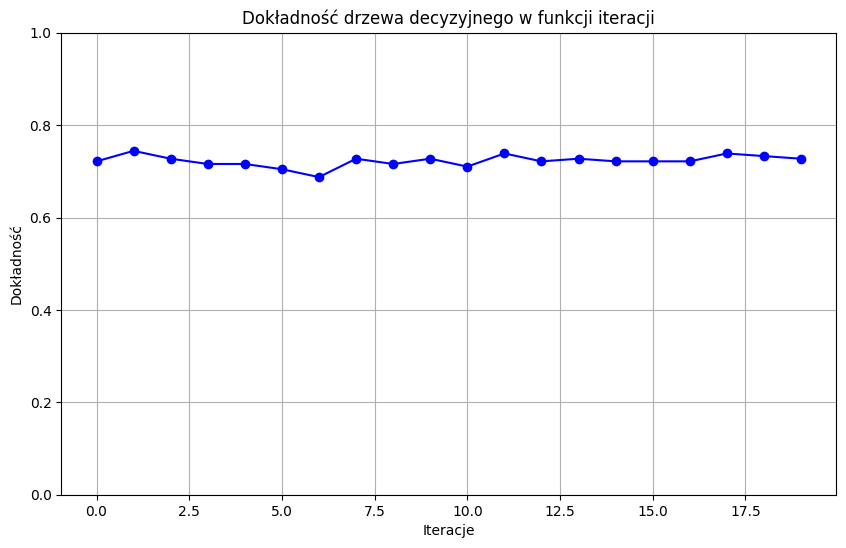

In [33]:
# List to store accuracy scores
accuracy_scores = []

for x in range(0, 20):
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred_dt)
    
    # Append accuracy to list
    accuracy_scores.append(accuracy_dt)
    
    print(f'Drzewa decyzyjne - Dokładność: {accuracy_dt * 100:.2f}%')

# Plotting accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(range(0, 20), accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Dokładność drzewa decyzyjnego w funkcji iteracji')
plt.xlabel('Iteracje')
plt.ylabel('Dokładność')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


## Graficzna reprezentacja dokładności dla 20 iteracji. Jak widać mamy tu podejżenie losowości otrzymywanej dokładności. Powodem tego może być:
<ol>
<li>Losowość algorytmu:

Algorytmy drzewa decyzyjnego mają komponenty losowe, takie jak wybór podziałów w węzłach, jeśli wiele podziałów daje takie same wyniki. Jeśli losowość nie jest ustalona za pomocą ziarna (random_state), różnice w wynikach pojawiają się nawet przy tym samym zbiorze danych.</li>
<li>Niewielki zbiór danych testowych: (170 rekordów)

W przypadku małych lub umiarkowanych rozmiarów zbiorów danych, nawet niewielkie zmiany w danych testowych mogą prowadzić do zauważalnych wahań dokładności.</li>
<li>Overfitting (nadmierne dopasowanie):

Drzewa decyzyjne są znane z tendencji do nadmiernego dopasowania się do danych treningowych. Nawet niewielkie zmiany w danych mogą prowadzić do różnych struktur drzew, co może skutkować różnymi wynikami na zbiorze testowym.</li>


## Naniesienie dokładności wszystkich klasyfikatorów na wykres słupkowy

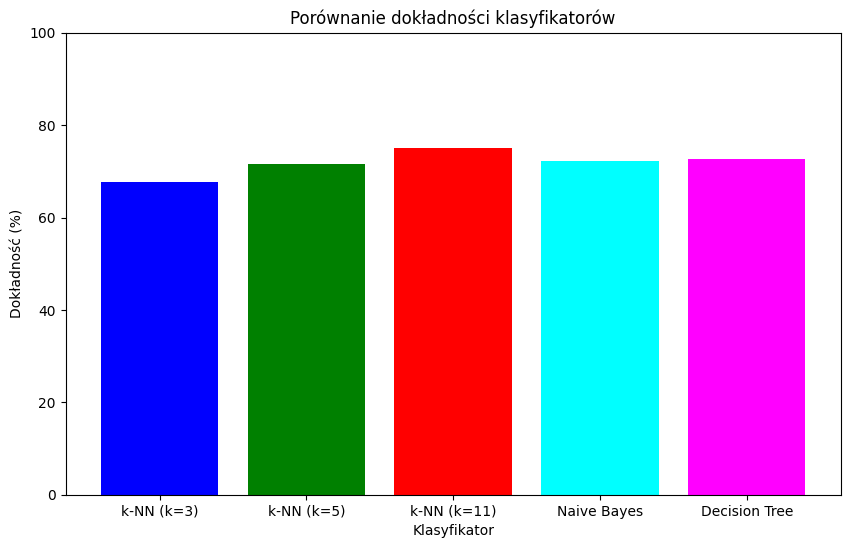

In [34]:
labels = ['k-NN (k=3)', 'k-NN (k=5)', 'k-NN (k=11)', 'Naive Bayes', 'Decision Tree']
accuracies = [accuracy_knn3 * 100, accuracy_knn5 * 100, accuracy_knn11 * 100, accuracy_nb * 100, accuracy_dt * 100]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta'])
plt.xlabel('Klasyfikator')
plt.ylabel('Dokładność (%)')
plt.title('Porównanie dokładności klasyfikatorów')
plt.ylim([0, 100])
plt.show()


## Wnioski i Odpowiedź na dodatkowe pytanie:
Jak widzimy w kwestii dokładności najlepszym wyborem okazał się klasyfikator k-NN z k=11, jednak nie jest on najbezpieczniejszy dla pacjentów. W macierzy błędu interesują nas wyniki fałszywie negatywne, które mogą spowodować odesłanie chorego pacjenta do domu. W przypadku najmniejszej ilości fałszywie negatywnych wyników wygrywa skutecznością algorytm <b><i>naiwny bayesowski.<i></b></br>

Podsumowując, analiza danych dotyczących cukrzycy obejmowała ocenę skuteczności kilku klasyfikatorów. Klasyfikator KNN (k=11) osiągnął najwyższą dokładność (75%), co wskazuje na jego dobrą wydajność. Jednak w kontekście minimalizacji fałszywie negatywnych wyników (False Negative), gdzie chorych klasyfikuje się jako zdrowych, najlepszy okazał się naiwny Bayes z najniższą liczbą FN (20). Ostatecznie, dobór algorytmu powinien zależeć od celu w jakim go stosujemy. 